# Basic statistical concepts


**Course: "Introduction to data analysis methods for HEP"**

*Author: Jose A. Hernando*, January 2017

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*

These is a series of lectures on Data Analysis for High Energy Physics. Emphasis is put on Hypothesis testing and Confidence Intervals. They are based on the excellent lectures on statistics by Prosper [1], Cowan [2] and Cranmer [3] given at CERN Academic Training.

The most common data analysis packages in HEP are ROOT, RooFit and TMVA [8]. But we will use the Python scientific toolkits, Matplotlib, Numpy, Scipy, Scikit-learn [9] that are distributed with Anaconda Python [9]. 

Structure of the course:
* General Concepts: probability density functions and likelihoods. Frequentist and bayesian statistics
* Hypothesis testings: test statistic. Continuous hypothesis. CLs method.
* Confidence Interval: Classical and F.C. intervals.
* MVA: Classification.
* Regression: Likelihood estimation.

Structure of the chapter:
* Introduction: 
* 1. Probability and Bayes' theorem
* 2. Frequentist and Bayes: the great divide
* 3. probability density functions: moments, likelihood and posterior probabity
* 4. common pdfs
* 5. non-parametric pdfs
* Bibliography

In [1]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

In [2]:
import time

print ' Last Execution ', time.asctime()

 Last Execution  Tue Jan 31 17:37:56 2017


---

## Introduction

This notes present some statististical data analysis methods common to High Energy Physics (HEP). Thanks to the increasingly computational power we have nowadays access to powerful numerical methods. They are able to extract information from complex data. In addition, Monte Carlo (MC) techniques allow us to simulate experiments. But with power comes care, we must understand how and when to use a method, and what its result means.

In general, in HEP we collect a **dataset** of events (**samples**), each one has a list of variables (**features**). And from those features we estimate a relevant parameter or parameters. Data analysis can be:
* **Classification** of the data. Data belongs to different categories (**classes**) that we know exists.  For example a particle can be identified as a pion or a kaon. What is the most likely class for a given sample?
* **Hypothesis testing**. In some cases we have competing hypothesis. Usually we have a default (or null) hypothesis and the alternative one that we want to test. Is there a new particle in the dataset? Is the Higgs? When do we reject the null hypothesis and accept the alternative one? When to discard the alternative hypothesis at a given confidence level?
* Setting limits or **confidence intervals** for a relevant parameter at a given **confidence level**. If a certain particle has not been found we set a upper limit on a cross-section, otherwise we provide a confidence interval that covers with a certain confidence level the range of the cross-section. 
* **Regression**: estimate the value of a parameter (or parameters) and their uncertainties, i.e, to estimate the Higgs mass.

We will briefly review some of the methods used in each of the tasks. But before, we should revisit basic concepts from probability and statistics.


## Probability and Bayes' theorem

Nature is probabilistic and our measurements are too. 

The starting point of probability are the **Kolmogorov axioms**:

* the probability for an event, $E$, is non negative $P(E)\ge 0$,
* the probability for the entire space of possibilities,$\Omega$, is one, $P(\Omega) = 1$,
* the probability for disjoint events, $E_1,\dots,E_n$, is additive, $P(E_1 \cup \dots \cup E_n) = \sum_{i=1,n} P(E_i)$.

From there we obtain the following corollaries:
* $P(A \cup B) = P(A) + P(B) - P(A \cap B) $
* $P(!E) = 1- P(E)$ 
where $!E$ is probability that $E$ does not happen.

Consider the case of a dice. There are six possible events $\Omega = \{1,2,3,4,5,6\}$, each one has a probability $P(E)=1/6 \; E=\{1,2,3,4,5,6\}$. 

If you are a frequentist you could compute the probability for each event just rolling the dice $n$, large, number of times, and computing the frequency of that event.
If you are a bayesian, most likely, you will asing a prior probability of 1/6 for each event.


### Bayes' theorem

The probability $P(A)$ that an event happens, for example that rolling the dice we get 3, is called marginal probability. The probability that an event $A$ happens if another one $B$ has happened is called conditional probability $P(A|B)$. For example, the probability that rolling your dice is 3 if you know that the number obtained was odd, in that case $P(3|\mathrm{odd})=1/3$. The Bayes' theorem relates both probabilities. 

If $A,B$ are two events with marginal probabilities $P(A),\, P(B)$, the conditional probabilities $P(A|B), \, P(B|A)$ are:

$$
P(A|B) = \frac{P(B|A)\,P(A)}{P(B)}
$$


**Example:** consider the experiment of rolling two dices, $A$ is the case when the sum of both dices is 6, and $B$ when one of them is 4. Verify the Baye's theorem.

The probability to get six adding both dices is $P(A)= 5/36$, possible outcomes are $\{(1,5),(2,4),(3,3),(4,2),(5,1)\}$, the probability to get four when the addition is six is therefore $P(B|A)=2/5$. Now, the probability to get one dice with four is $P(B)=11/36$, and the probability that both add six if one is four is $2/11$, therefore:
$$
\frac{11}{36} \, \frac{2}{11} = \frac{2}{5} \, \frac{5}{36} = \frac{1}{18}
$$
what verifies the Bayes' theorem.


In [3]:
nsamples = 100000
xs = np.random.choice(np.arange(6), size=(nsamples, 2))

print 'nsamples {:d}'.format(nsamples)
As = np.array([xi for xi in xs if np.sum(xi) == 6])
Bs = np.array([xi for xi in xs if len(np.argwhere(xi == 4)) > 0])
pA = 1.*len(As)/(1.*nsamples)
pB = 1.*len(Bs)/(1.*nsamples)
print 'p(A) = {:5.3f}'.format(pA)
print 'p(B) = {:5.3f}'.format(pB)

BAs = np.array([xi for xi in As if len(np.argwhere(xi == 4) > 0)])
ABs = np.array([xi for xi in Bs if np.sum(xi) == 6])

pBA = 1.*len(BAs)/(1.*len(As))
pAB = 1.*len(ABs)/(1.*len(Bs))
print 'p(B|A) = {:5.3f}'.format(pBA)
print 'p(A|B) = {:5.2f}'.format(pAB)

print 'p(B|A) p(A) = {:5.3f}'.format(pBA*pA)
print 'p(A|B) p(B) = {:5.3f}'.format(pAB*pB)

nsamples 100000
p(A) = 0.138
p(B) = 0.304
p(B|A) = 0.398
p(A|B) =  0.18
p(B|A) p(A) = 0.055
p(A|B) p(B) = 0.055


**Exercise:** The probability of an individual to have HIV+ is 1 in 10000. A test of HIV, is the patient is HIV+, is positive in 99 % of the times, but a HIV- person can wrongly test positive in 2 % of the times. After a HIV test, a patient is diagnotics with HIV+, what is the probability that has HIV+? 

We want to estimate $p(HIV+ | +)$!

$$
\begin{array}{l}
p(HIV+) = 0.0001, \; p(HIV-) = 0.9999, \; p(+|HIV+) = 0.99, \, p(+|HIV-)=0.02 \\
p(HIV+|+) p(+)= p(+| HIV+) p(HIV+) \\
p(+) = p(+|HIV+)p(HIV+) + p(+|HIV-) p(HIV-) \\
p(HIV+|+) = \frac{p(+|HIV+) p(HIV+)}{p(+|HIV+)p(HIV+) + p(+|HIV-) p(HIV-)} \\
p(HIV+|+) = \frac{0.99 \, 0.001}{0.99 \, 0.001 + 0.02 \, 0.999} \\
\end{array}
$$

In [4]:
pH, pHnot = 0.0001, 0.9999
ppH, ppHnot = 0.99, 0.02
pp = ppH*pH+ppHnot*pHnot
pHp = ppH*pH/pp

print 'probability to test + is p(+) = {:5.3f}'.format(pp)
print 'probability to be HIV+ is tested + is p(HIV+|+) = {:5.3f}'.format(pHp)

probability to test + is p(+) = 0.020
probability to be HIV+ is tested + is p(HIV+|+) = 0.005


**Exercise:** What is the probability if repeating the test, it still gives positive?

In [5]:
pH = pHp
pHnot = 1.-pH

pp = ppH*pH+ppHnot*pHnot
pHp = ppH*pH/pp

print 'probability to test + is p(+) = {:5.3f}'.format(pp)
print 'probability to be HIV+ is tested + is p(HIV+|+) = {:5.3f}'.format(pHp)


probability to test + is p(+) = 0.025
probability to be HIV+ is tested + is p(HIV+|+) = 0.197


**Exercise:** A neutrino experiment has a problem with the DAQ, and 5% of the runing time it does not observe interactions. The neutrinos are produced by a reactor nearby that operates 75% of the time. In this moment, the experiment does not observe neutrinos, what is the probability that the reactor is off?

$p(!R| !D)$?

$$
\begin{array}{l} 
p(!D |R) = 0.05, \; p(R) = 0.75 \\
p(!R|!D) p(!D) = p(!D|!R)P(!R) \\
p(!R|!D) = p(!R)/p(!D) \\
P(!D) = p(!R)+P(!D|!R)p(R) \\
p(!R|!D) = \frac{p(!R)}{p(!R)+p(!D|R)p(R)}
\end{array}
$$


In [6]:
pnotR = 0.25
pR = 1.-pnotR
pnotDR = 0.05

pnotRnotD = pnotR/(pnotR+pnotDR*pR)
print 'probability that the reactor is off p(!R|!D) = {:5.3f}'.format(pnotRnotD)

probability that the reactor is off p(!R|!D) = 0.870


## Frequentist vs Bayesians

The is a great divide in statistics: frequentist vs Bayesians. 

Frequentist are inductive. They compute the probability of an observation by repeating the same experiment many times. They test is the data is compatible with the theory. They claim:

$$
f(x | \mu)
$$
where $\mu$ is the theory and $x$ the data. $f(x | \mu)$ is called the **likelihood function**

Bayesians are deductive. They compute the probability using the Bayes' theorem. They need to assign first a prior probability based in a 'reasonable' guess. They measure the credibility of a theory based on the data. They claim:

$$
p(\mu | x)
$$
that is called **posterior probability**.

Most of physicist we are bayesians, but we think of ourselves as frequentists. Consider the discovery of the Higgs. If you are frequentist you claim: "LHC data strongly disagrees with the hypothesis of the SM without the Higgs and agrees with a Higgs in the SM.", while a Bayesian claims: "We have discovered the Higgs!"


## 3. Probability density functions


In physics the variables that we measure are of probabilistic nature, therefore are **random variables** (rv). The probability distribution, $f(x)$ that follow a rv is called **probability density function**, pdf. If $x$ takes discrete values, the name is **probability mass function** (pmf)

From the probability axions we have: 
$$
\int_{-\infty}^{\infty} f(x) \mathrm{d}x = 1
$$

We give the cumutative density function (cdf), $F(x)$, as:
$$
F(x) = \int_{-\infty}^{x} f(x) \mathrm{d}x
$$

In the case the input variables ${\bf x}$ is a rv vector, the $f({\bf x})$ is a scalar n-dimensional function. If the variables are uncorrelated them, the pdf is the product of the individual pdfs.
$$
f({\bf x}) = \Pi_{i=1,n} f_i(x_i)
$$

We call marginal pdf when one or more rvs are integrated out, for example if we integrate $x_n$:
$$
f(x_1,\dots,x_{n-1}) = \int f({\bf x}) \mathrm{d}x_n
$$
We can "project" the pdf in one axis, that is get the marginal pdf for each variable $x_i$ individually:
$$
f(x_j) = \int f({\bf x}) \, \Pi_{i=1,n; i \neq j} \, \mathrm{d}x_i
$$



**Example:** Consider the case in which we try to observe a signal event in $n$ independent channels. In each one we expect $b_i$ background events and, if there is signal, $s_i$ events. What is the total PDF?

As the channels are $n$ independent, the pdf is the product of the pdf of each channel. In each channel we can observe $n_i$ events, the total observation is ${\bf n} = (n_1,\dots,n_n)$. The pdfs for the $b$, background only, and $b+s$, background and signal hypothesis are distributed with a Poisson:
$$
f({\bf n}|s,b) = \Pi_{i=1,n} \frac{(s_i+b_i)^{n_i}}{n_i!} e^{-(s_i+b_i)}, \;\;\;
f({\bf n}|b) = \Pi_{i=1,n} \frac{b_i^{n_i}}{n_i!} e^{-b_i}
$$



### Likelihood 

The pdf is the probability to measure $x$ given some parameters $\mu$ of the distribution, $f(x|\mu)$. For example, the pdf of gaussian distribution with mean 1 and sigma 1 is:
$$
f(x|\mu=0, \sigma=1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$

A **likelihood** is the probability evaluted at the observed data, $f(x|\mu)$. But notice that now $x$ is a measurement! 

For n, ${\bf x}$, independent measurements of a distribution with a pdf, the likelihood is the product of the likelihood of each measurement $x_i$:
$$
f({\bf x} | \mu) = \Pi_{i=1}^n f(x_i | \mu)
$$

Consider that we have done two independent meassurements of the normal distribution $x_0=1., x_1=2.$, the likelihood is:
$$
f(\{1., 2.\}) = \frac{1}{2\pi} e^{-5/2}
$$

In some cases, we can express the likelihood as a function of the parameters $\mu$:
$$
\mathcal{L}(\mu) \equiv f(x | \mu),
$$
is the **likelihood function** (remember that $x$ is a measurement or a series of measurements).

One of the common methods to estimate a parameter is to find the best parameter value that maximizes the likelihood function (see the regression chapter). 

The likelihood can be a very small number, for that reason, it is common to take the logarithm, and called *log likelihood*.
$$
-2 \log \mathcal{L}(\mu)
$$

**Exercise:** Generate $n$ samples of a normal. Compute the likelihood function of the mean (fix sigma of the gaussian to 1)

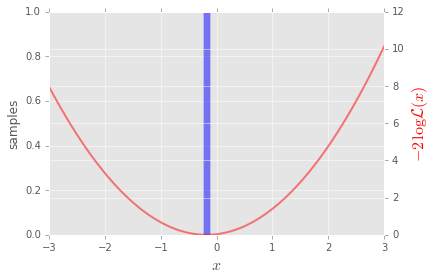

In [7]:
n = 1
xs = stats.norm.rvs(size=n)

def ll(x, xs):
    dx = (x-xs)
    return np.sum(dx*dx)

fig, ax = plt.subplots()

ax.hist(xs, bins=50, alpha=0.5, range=(-3., 3.), color='blue')
axb = ax.twinx()

mus = np.linspace(-3., 3., 100)
lls = np.array([ll(mu, xs) for mu in mus])
axb.plot(mus, lls, alpha=0.5, color='red', lw=2)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('samples');
axb.set_ylabel('$-2 \, \log \mathcal{L}(x)$', color='red', fontsize=16)
fig.savefig('figs/gen_likelihood_example.png');



### Posterior probability in bayesian statistics

With bayesian statistic one can improve a prior "knowledge" using the data.
Suppose that we have an ensemble of possible hypothesis $h$, with a prior probability $\pi(h)$. Given some observation, $x$, Bayes' theorem allow us to compute the **posterior probability**, $\pi'(h)$. The probability of $h$ given the data $x$, $p(h|x)$, is: 
$$
p(h|x) = \frac{p(x|h) \pi(h)}{\int p(x|h) \pi(h) \mathrm{d}h}
$$
As the total probability for the ensemble of hypothesis $h$ should be one, we can obtain the posterior probability $\pi'(h)$, just normalizing the conditional probability of each hypothesis:
$$
\pi'(h) = \frac{p(h|x)}{ \int p(h|x) \mathrm{d}h}
$$


**Exercise:** There are several dices in a box, with 4, 6, 12 and 24 sides. We pick one randomly and we roll it four times, with outcomes, $1,4,5,2$, what is the posterior probability that the selected dice has 4, 6, 12 or 24 sides?, what is the posterior probability if we roll it twice again and wet get 6 and 1? 

### Expectation values

Given a $x$ rv that follows a pdf, $f(x)$, and a function $g(x)$ on $x$, we define the expected value of $g(x)$ as:
$$
E[g(x)] \equiv \int g(x) \, f(x) \, \mathrm{d}x
$$

The **mean**, or average value, is the expected value of $x$:
$$
E[x] = \mu \equiv  \int x \, f(x) \, \mathrm{d}x
$$
The **variance** is the expected value of $(x-\mu)^2$:
$$
V[x] = \sigma^2 = E[(x-\mu)^2]= E[x^2]-\mu^2 \equiv \int (x-\mu)^2 \, f(x) \, \mathrm{d}x
$$
We call **standard deviation** to:
$$
\sigma = \sqrt{V[x]}
$$
The standard deviation is related with the spread of the pdf, while the mean is related with the center of density of the pdf. 

Finally, the **expected value** is the $x$ value with the highest $f(x)$, and the **median**, is the $x_{med}$ value that divides the distribution in half, 
$$
\int_0^{x_{med}} f(x) \mathrm{d}x = 0.5
$$
For a symmetric pdf, the mean and median are the same.


If ${\bf x}$ is a vector, the pdf is a n-dimensional function. In that case, we define the covariance element between $i$ and $j$ elements as:
$$
\mathrm{cov}[x_i,x_j] = \int x_i \, x_j \, f({\bf x}) \; \Pi_{i=1,n} \mathrm{d}x_i
$$
If the variables $x_i, \, x_j$ variables are independent then the covariance is zero. But the contrary is not necessarily true.


## 4. Common probability density functions

The most commont distributions in HEP are:

* **Binomial**. A event can happen with probability $p$. The probability to get $n$ events if we try $N$ times is given by the binomial pdf.
$$
f(n|N,p) = \frac{N!}{n! (N-n)!} p^n (1-p)^{N-n}
$$
* **Poisson**. Related with the number of events if we expect $\nu$. The number of interactions in a crossing of the LHC beams is modeled with a poisson.
$$ 
f(n|\nu) = \frac{\nu^n}{n!} e^{-\nu}
$$ 
* **Uniform**. Equal probability to get $x$ in an interval $[a, b]$.
$$
f(x|a,b) = \frac{1}{(b-a)}
$$
* **Exponential**. An event can happen in $x$ with probability $1/\tau$. It describes the time of particles decays.
$$
f(x|\tau) = \frac{1}{\tau} e^{-x/\tau}
$$
* **Gaussian** (or normal). Associated with the distributions of measurements.
$$ 
f(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 
* **$\chi^2_n$** with $n$ degrees of freedom. Associated with goodness of fit.
$$
f(x|n) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{n/2-1}e^{-x/2}
$$
* **Breit-Wigner**. Describes the distribution of masses in resonances. 
$$
f(x|\Gamma,x_0) = \frac{1}{\pi} \frac{\Gamma/2}{\Gamma^2/4 + (x-x_0)^2} 
$$
* **Beta**. Associated with the measurement of probabilities. Used in Bayesian statistics.
$$
f(x | \alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
$$
where $x, \alpha, \beta$ are positive.
* **Gamma**. Associated with bayesian statistics with poisson distributions. 
$$
f(x | \alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-x \beta}
$$
where $x, \alpha, \beta$ are positive.


The binomial pdf has as parameters the probability $p$ of an event to happen and the $N$ number of trials. $f(n;N,p)$ is the probability to obtain $n$ events. Consider flipping a coin, the probability to get head is $1/2$. If we try $N$ times, the probability to get $n \le N$ heads is $f(n;N,p=1/2)$

Some of the PDFs are nicely related. In the case that an event is rare but we do a large number of trials, their distribution follow a binomial with $p\to 0$, $N\to \infty$, if $ N \, p = \nu$ is constant, (this happens in nuclei decays), the binomial transform into Poisson with mean $\nu$. When $\nu$ is "large", (>12 is enough) the Poisson transforms into Gaussian with $\mu=\nu$. When we take n values of $x$, gaussian distributed, with mean $\mu$ and sigma $\sigma$, and compute $\chi^2 = \sum_{i=1,n} \frac{(x_i -\mu)^2}{\sigma^2}$, it follows a chi-squared distribution with $n$ degrees of freedom.


**Exercise:** Compare a poisson distribution, with $\nu=p \, N$ with a binomial when $N$ is large and $p$ is small.

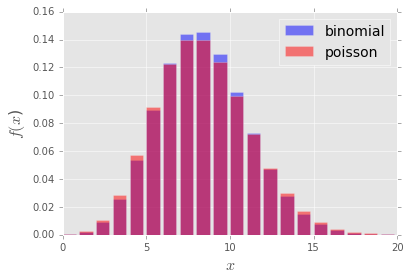

In [8]:
N, p = 100, 0.08

ns = np.arange(20)
fig, ax = plt.subplots()
ax.bar(ns, stats.binom.pmf(ns, N, p), color='blue', alpha=0.5, label='binomial')
ax.bar(ns, stats.poisson.pmf(ns, N*p), color='red', alpha=0.5, label='poisson')
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$f(x$)', fontsize=16)
ax.legend(fontsize=14)
fig.savefig('figs/gen_binomial_poisson.png');

**Exercise:** Check that from a "large" $\nu$ the poisson distribution is equivalent to a gaussian distribution.

**Exercise:** Generate $m$ samples, each one with $n$ measurements, $x_i$ distributed random in $[0, 1]$ interval, sum the $n$ numbers, $\sum_i^n x_i$ and obtain the distribution of the $m$ samples.

**Exercise:** Generate $m$ samples, each with $n$ measurements, $x_i$, normal distributed, compute its distance squared $\chi^2 = \sum_{i=1}^n x^2_i$, what is the distribution of $\chi^2$?

**Exercise:** Get the possion distribution from a Gamma distribution.

**Exercise:** Get an exponential distribution from a Gamma distribution.

**Exercise:** Get the $\chi^2$ distribution from a Gamma distribution.

**Exercise:** Study the Beta distribution for different parameters of $\alpha, \beta$ (start $\alpha=\beta=1$).

## Non parametric pdfs

In some cases we do not know the parametric pdf that describes our sample, but we can try to infer a **non-parametrical pdf** using the data itself.

One possibility is to use a kernel function around each point of the sample. Given a kernel function, $k(u)$, we can construct the pdf as:
$$
f(x) = \frac{1}{n} \sum_{i=1}^{n} k(u_i)
$$
where $u = |x-x_i|/w$, and $w$ the width of the kernel. The kernel is also a symmetric function on $u$. There are many kernel functions that we can use: 
$$
k(u) = (1-|u|), \;\;\; k(u) = \frac{3}{4} (1-u^2), \;\;\; \frac{1}{\sqrt{2\pi}}e^{-\frac{u^2}{2}}
$$
for the two first kernels $|u|\le 1$. They correspond to a triangular, a Epanechnikov and gaussian shapes, respectively. There is also the possibility to use "adaptative" kernels, which width depend on the distance to the nearest neighbors. There is a large industry about the kernel functions to use!



**Example:** Generate n (small) samples with two gaussian with sigma 1 and means 0, 5.
Plot the normalized histogram. Use different kernels to obtain a non-parametric pdf.

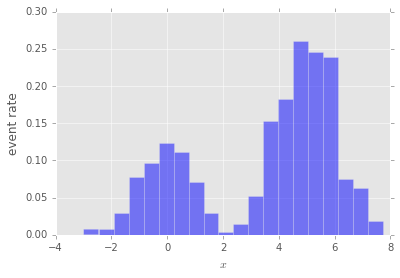

In [9]:
from sklearn.neighbors import KernelDensity

# generate X matrix (n-samples, n-features = 1)
N = 500
xs = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))
X = xs.reshape(len(xs,), 1)

X_plot = np.linspace(-5, 10, 1000).reshape(1000, 1)
fig, ax = plt.subplots();

ax.hist(X[:, 0], bins=20, normed=True, color='blue', alpha=0.5);
ax.set_xlabel('$x$')
ax.set_ylabel('event rate');

pdf gaussian integral 1.000
pdf tophat integral 1.000
pdf epanechnikov integral 1.000
pdf linear integral 1.000


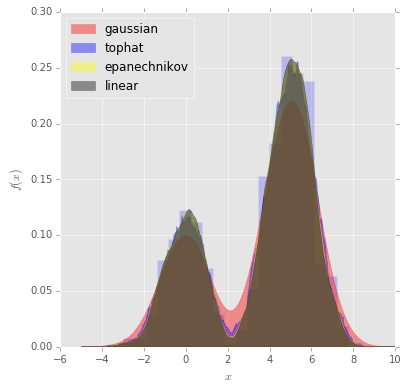

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(X[:, 0], bins=20, normed=True, color='blue', alpha=0.2);

colors = ['red', 'blue', 'yellow', 'black']
kernels= ['gaussian', 'tophat', 'epanechnikov', 'linear']
kernelwidth = 0.75
for i, kernel in enumerate(kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=kernelwidth)
    # fit the kde dataset
    kde.fit(X)
    # score_samples returns the log for x-points, get back the pdf
    pdfs = np.exp(kde.score_samples(X_plot))
    integral = np.sum(pdfs)*(X_plot[1]-X_plot[0])[0]
    print 'pdf {:s} integral {:5.3f}'.format(kernel, integral)
    ax.fill(X_plot[:, 0], pdfs, color=colors[i], alpha=0.4, label=kernel)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend(loc=2)
fig.savefig('figs/gen_nonparam_pdf.png');

---

## Bibliography

[1] "Practical Statistic for LHC physicist," H. B. Prosper, CERN Academic Training Lectures (2015). https://indico.cern.ch/event/358542/ https://arxiv.org/pdf/1504.00945.pdf

[2] "Statistic for HEP," G. Cowan. CERN Academic Training Lectures (2012). http://indico.cern.ch/event/173726/

[3] "Statistics for Particle Physics," K. Cranmer, CERN Academic Training Lectures (2009). 
https://indico.cern.ch/event/48425/

[4] "Unified approach to the classical statistical analysis of small signals, "G. J. Feldman and R. D. Cousins, Phys. Rev. D57 (1998) 3873. http://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873

[5] “Asymptotic formulae for likelihood-based tests of new physics,” Glen Cowan, Kyle Cranmer, Eilam Gross, Ofer Vitells. Eur. Phys. J. C71 1554 (2011). https://arxiv.org/abs/1007.1727

[6] "Incorporating systematic uncertainties into an upper limit," R.D. Cousins and V.L. Highland. Nucl. Instrum. Meth. A320, 331 (1992). http://www.sciencedirect.com/science/article/pii/0168900292907945

[7] "Confidence Level Computation for Combining Searches with Small Statistics," T. Junk, Nucl. Instrum. Meth. A434, 435 (1999). https://arxiv.org/abs/hep-ex/9902006  

[8] ROOT https://root.cern.ch, TMVA http://tmva.sourceforge.net, RooFit https://root.cern.ch/roofit

[9] Anaconda https://anaconda.org, SciPy https://www.scipy.org, NumPy http://www.numpy.org, Scikit-learn http://scikit-learn.org/stable/, Matplotlib http://matplotlib.org